In [1]:
import numpy as np                #For importing libraries
import pandas as pd
import matplotlib.pyplot as plt

**DATA ANALYSIS**

In [2]:
from google.colab import files        #for uploading train.csv file from local device
uploaded=files.upload()

Saving train.csv to train.csv


In [47]:
df=pd.read_csv('train.csv')

In [48]:
df.replace({
    'male':1,'female':0
},inplace=True)                 #replaced categorical value with numbers

Sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

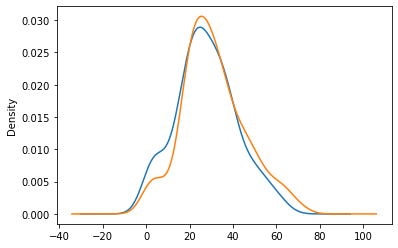

In [34]:
df.groupby('Sex').Age.plot(kind='kde')          #for checking age distribution 

In [49]:
df.fillna({
    'Age':df['Age'].mean()
},inplace=True)                 #replaced missing value with mean

In [50]:
y = df.iloc[:, 1].values        #for array

In [51]:
X=df.iloc[:,2:].values

In [52]:
X[:,2:3]=X[:,2:3]/X[:,2:3].max()        #normalising 
X[:,5:6]=X[:,5:6]/X[:,5:6].max()

In [53]:
X

array([[3.        , 1.        , 0.30985915, 1.        , 0.        ,
        0.01415106],
       [1.        , 0.        , 0.53521127, 1.        , 0.        ,
        0.13913574],
       [3.        , 0.        , 0.36619718, 0.        , 0.        ,
        0.01546857],
       ...,
       [3.        , 0.        , 0.36619718, 1.        , 0.        ,
        0.03142511],
       [2.        , 0.        , 0.05633803, 2.        , 1.        ,
        0.07612293],
       [2.        , 1.        , 0.36619718, 0.        , 0.        ,
        0.02049464]])

**TRAIN**

In [54]:
def hypothesis(X, theta):
  return np.dot(X, theta)

def sigmoid(z):
  return 1.0/(1+np.exp(-1*z))

z=np.ones(m)
z=z.reshape(m,1)
X=np.append(z,X,axis=1)

In [55]:
m,n=X.shape
theta=np.zeros(n)
theta=theta.reshape(n,1)
y=y.reshape(-1,1)

In [56]:
def ComputeCost(theta,X,y):
  infunc=-y*(np.log(sigmoid(hypothesis(X, theta))))-(1-y)*(np.log(1-sigmoid(hypothesis(X, theta))))
  j=np.sum(infunc)/m
  return j

In [57]:
iterations=50000
alpha=0.15

In [72]:
def GradientDescent(x,y,theta,alpha,iterations):        #run this cell 4-5 times for better result
  for _ in range (iterations):
    infunc1=sigmoid(hypothesis(X, theta))-y
    gradient=np.dot(X.transpose(),infunc1)/m
    theta=theta-(alpha/m)*gradient
  return theta

theta=GradientDescent(X,y,theta,alpha,iterations)
print(theta)

[[ 2.06054582]
 [-0.51214416]
 [-2.35949611]
 [ 0.09792204]
 [-0.20134343]
 [ 0.0837991 ]
 [ 0.40921416]]


In [73]:
L=ComputeCost(theta,X,y)                    #run everytime after previous cell and notice the change
print(L)

0.4720883415904052


In [74]:
A=np.dot(X,theta)                           #for replacing values
Array1=np.array(A)
Array2=np.where(Array1>0,1,Array1)
Array3=np.where(Array2<0,0,Array2)

In [75]:
def compute(y,pred):
  tp=sum((y==1) & (pred==1))
  tn=sum((y==0) & (pred==0))
  fp=sum((y==0) & (pred==1))
  fn=sum((y==1) & (pred==0))
  return tp,tn,fp,fn

tp,tn,fp,fn=compute(y,Array3)

In [76]:
print('TP: ',tp)
print('TN: ',tn)
print('FP: ',fp)
print('FN: ',fn)
accuracy=(tp+tn)/(tp+tn+fn+fp)
print('Accuracy(%): ',accuracy*100)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print('F1 Score: ',(2*precision*recall)/(precision + recall))

TP:  [170]
TN:  [323]
FP:  [53]
FN:  [74]
Accuracy(%):  [79.51612903]
F1 Score:  [0.72805139]


**TEST**

In [87]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test (1).csv


In [88]:
df=pd.read_csv('test.csv')

In [89]:
df.replace({
    'male':1,'female':0
},inplace=True)

In [90]:
X=df.iloc[:,2:].values
y = df.iloc[:, 1].values

In [92]:
X[:,5:6]=X[:,5:6]/X[:,5:6].max()
X[:,2:3]=X[:,2:3]/X[:,2:3].max()

In [93]:
m,n=X.shape
z=np.ones(m)
z=z.reshape(m,1)
X=np.append(z,X,axis=1)

In [94]:
m,n=X.shape
theta=np.zeros(n)
theta=theta.reshape(n,1)
y=y.reshape(-1,1)

In [95]:
A=np.dot(X,theta)
Array1=np.array(A)
Array2=np.where(Array1>0,1,Array1)
Array3=np.where(Array2<0,0,Array2)

In [103]:
def compute(y,pred):
  tp=sum((y==1) & (pred==1))
  tn=sum((y==0) & (pred==0))
  fp=sum((y==0) & (pred==1))
  fn=sum((y==1) & (pred==0))
  return tp,tn,fp,fn
tp,tn,fp,fn=compute(y,Array3)

In [104]:
print('TP: ',tp)
print('TN: ',tn)
print('FP: ',fp)
print('FN: ',fn)
accuracy=(tp+tn)/(tp+tn+fn+fp)
print('Accuracy(%): ',accuracy*100)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print('F1 Score: ',(2*precision*recall)/(precision + recall))

TP:  [0]
TN:  [0]
FP:  [0]
FN:  [0]
Accuracy(%):  [nan]
F1 Score:  [nan]


**REFERENCES**

https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

https://www.youtube.com/watch?v=zUElSvBAdKI&list=PL9mhv0CavXYgKBlBP5pBS8praAee4raZ8&index=5

https://medium.com/analytics-vidhya/your-guide-for-logistic-regression-with-titanic-dataset-784943523994#:~:text=Titanic%20Dataset.,%25%20alive%2C%2021%25%20dead.